In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [48]:
df=pd.read_csv('../data/processed/players_cleaned.csv')

In [49]:
df[['Age','Min','Gls','Ast','xG','xAG','PrgP']].describe()


,Age,Min,Gls,Ast,xG,xAG,PrgP
count,573.000000,574.000000,574.000000,574.000000,574.000000,574.000000,574.000000
mean,25.054101,1308.240418,1.885017,1.400697,1.919164,1.417247,48.930314
std,4.480596,1053.645962,3.537979,2.253498,3.176547,1.962813,53.902491
min,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,331.250000,0.000000,0.000000,0.100000,0.100000,6.000000
50%,25.000000,1103.500000,0.000000,0.000000,0.700000,0.600000,32.500000
75%,28.000000,2204.000000,2.000000,2.000000,2.200000,1.900000,74.750000
max,39.000000,3420.000000,29.000000,18.000000,25.200000,14.200000,325.000000


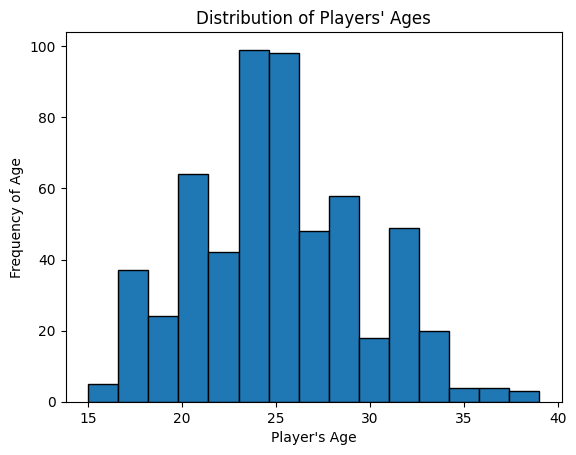

In [50]:
plt.hist(df['Age'].dropna(), bins=15, edgecolor='black')

plt.xlabel("Player's Age")
plt.ylabel("Frequency of Age")
plt.title("Distribution of Players' Ages")


plt.show()

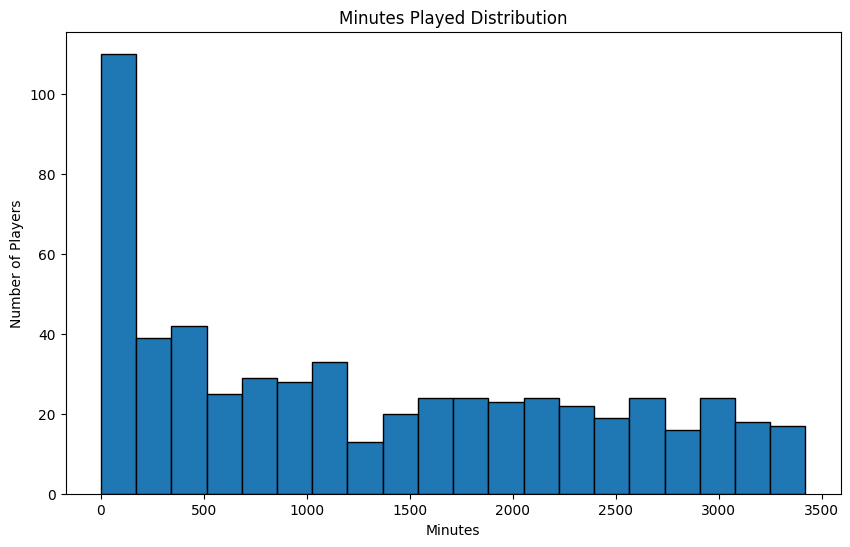

In [51]:
plt.figure(figsize=(10, 6))

plt.hist(df['Min'], bins=20,edgecolor='black')
plt.title("Minutes Played Distribution")
plt.xlabel("Minutes")
plt.ylabel("Number of Players")
plt.show()

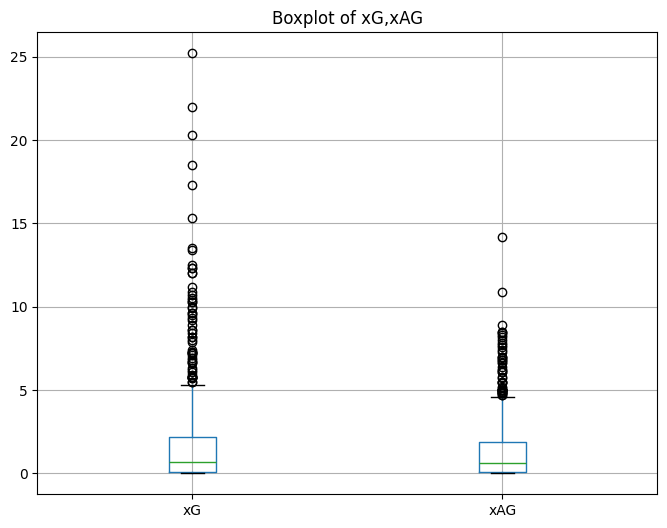

In [52]:
metrices=['xG','xAG']
plt.figure(figsize=(8, 6))  
df[metrices].boxplot()
plt.title("Boxplot of xG,xAG")

plt.show()

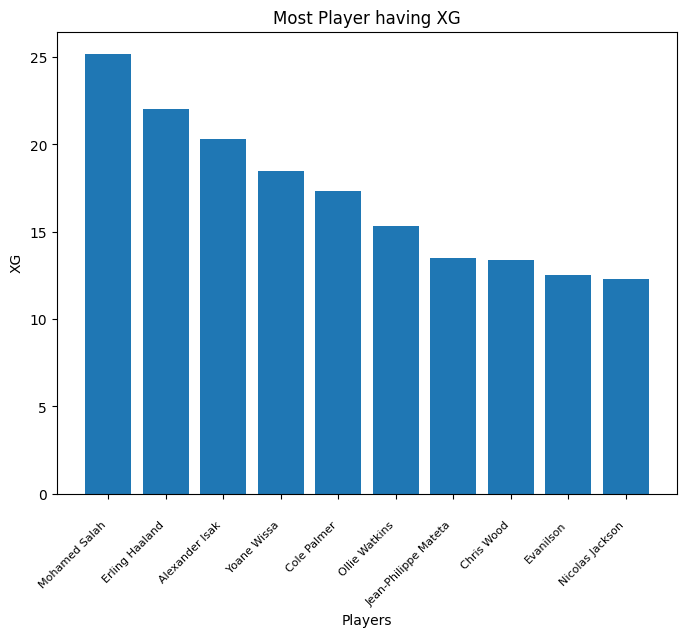

In [53]:
most_XG_players=df.nlargest(10,'xG')

plt.figure(figsize=(8, 6))  

plt.bar(most_XG_players['Player'],most_XG_players['xG'])
plt.title("Most Player having XG")
plt.xlabel("Players")
plt.ylabel("XG")
plt.xticks(fontsize=8, rotation=45, ha='right')
plt.tick_params(axis='x', which='major', pad=15)

plt.show()

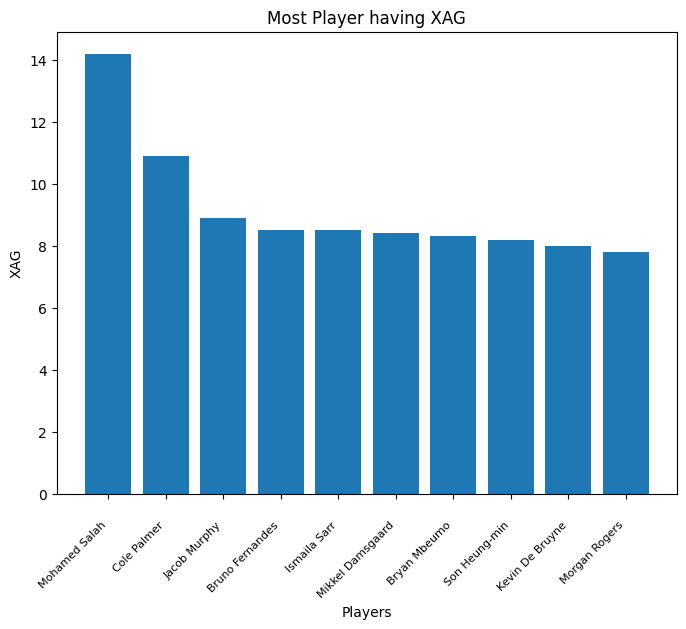

In [54]:
most_XAG_players=df.nlargest(10,'xAG')

plt.figure(figsize=(8, 6))  

plt.bar(most_XAG_players['Player'],most_XAG_players['xAG'])
plt.title("Most Player having XAG")
plt.xlabel("Players")
plt.ylabel("XAG")
plt.xticks(fontsize=8, rotation=45, ha='right')
plt.tick_params(axis='x', which='major', pad=15)

plt.show()

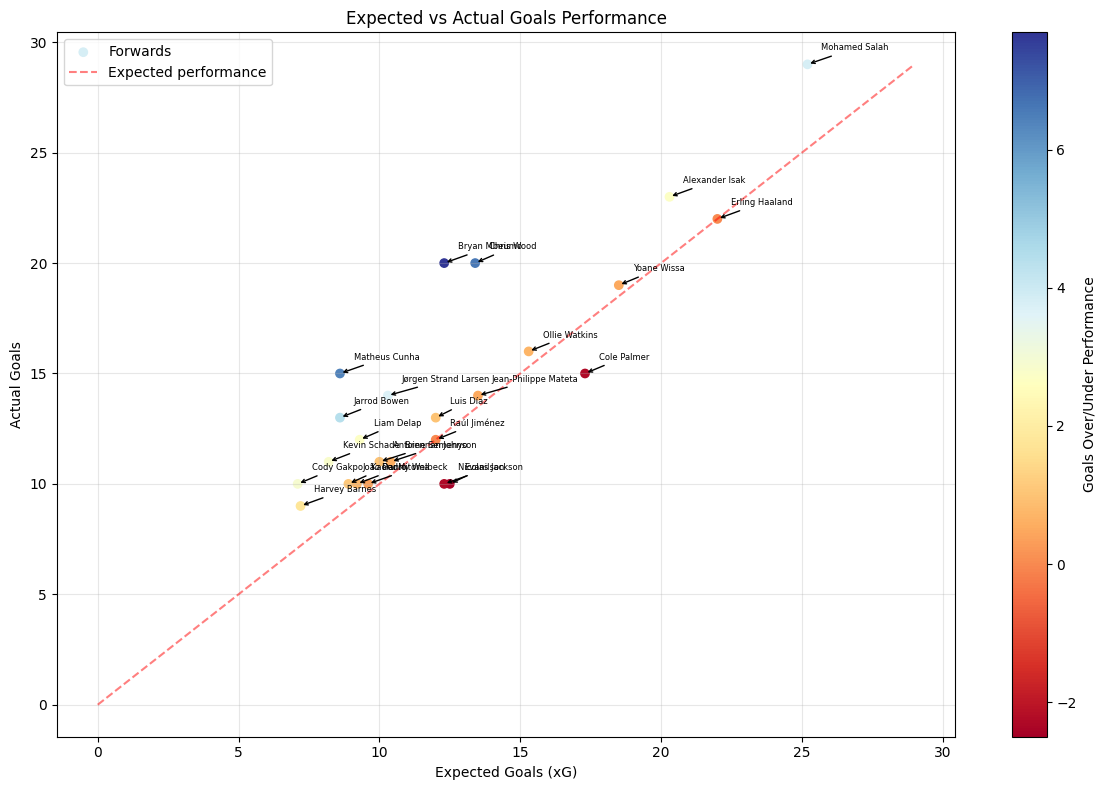

In [55]:
#plt.figure(dpi=200)
plt.figure(figsize=(12, 8))  

forwards_df = df[df['Pos'].str.contains('FW', na=False)].nlargest(25,'Gls')
scatter = plt.scatter(forwards_df['xG'], forwards_df['Gls'], 
                     alpha=1, # color contrast
                     c=forwards_df['XG-Overperformance'],
                     cmap='RdYlBu', 
                     label='Forwards')

max_val = max(forwards_df['xG'].max(), forwards_df['Gls'].max())
plt.plot([0,max_val],[0,max_val],'r--',alpha=0.5,label='Expected performance')

plt.xlabel('Expected Goals (xG)')
plt.ylabel('Actual Goals')
plt.title('Expected vs Actual Goals Performance')

for idx, row in forwards_df.iterrows():
         plt.annotate(row['Player'], 
                    (row['xG'], row['Gls']),
                    xytext=(10, 10), 
                    textcoords='offset points',
                    fontsize=6,
                   # bbox=dict(facecolor='white', alpha=0.1),
                    arrowprops=dict(arrowstyle='->'))

plt.colorbar(scatter, label='Goals Over/Under Performance')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


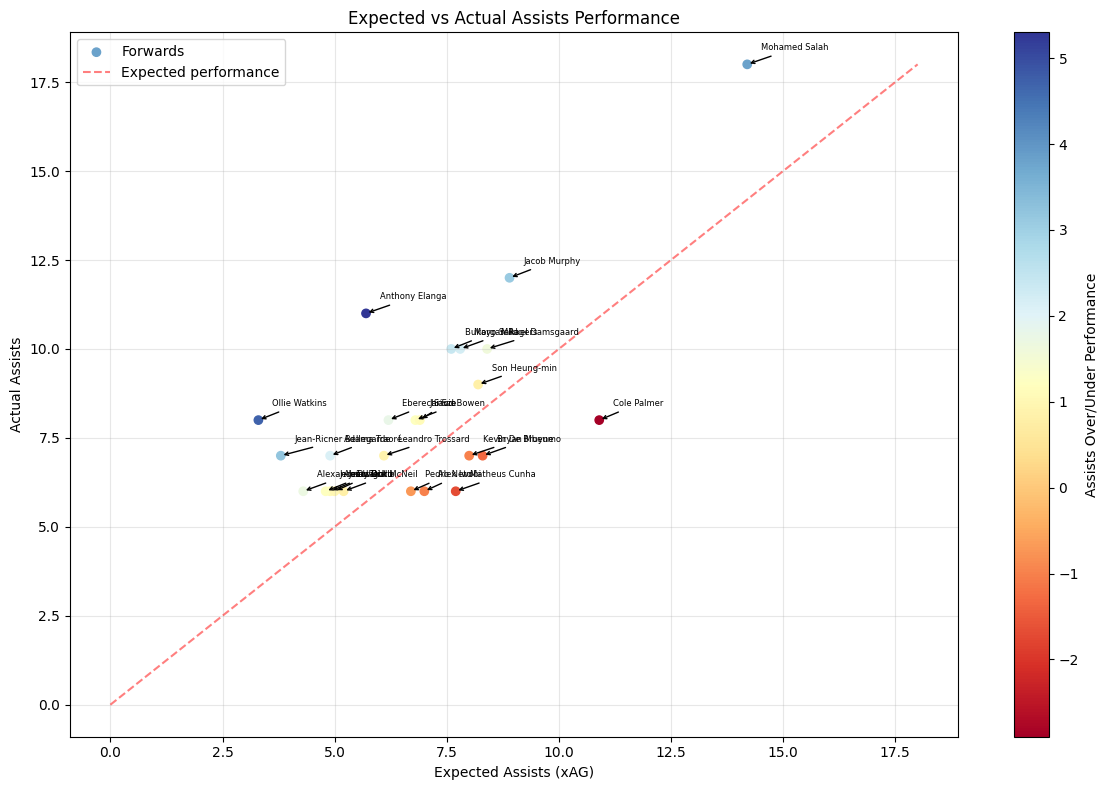

In [56]:
#plt.figure(dpi=200)
plt.figure(figsize=(12, 8))  

forwards_df = df[df['Pos'].str.contains('FW', na=False)].nlargest(25,'Ast')
scatter = plt.scatter(forwards_df['xAG'], forwards_df['Ast'], 
                     alpha=1, # color contrast
                     c=forwards_df['xAG-Overperformance'],
                     cmap='RdYlBu', 
                     label='Forwards')

max_val = max(forwards_df['xAG'].max(), forwards_df['Ast'].max())
plt.plot([0,max_val],[0,max_val],'r--',alpha=0.5,label='Expected performance')

plt.xlabel('Expected Assists (xAG)')
plt.ylabel('Actual Assists')
plt.title('Expected vs Actual Assists Performance')

for idx, row in forwards_df.iterrows():
         plt.annotate(row['Player'], 
                    (row['xAG'], row['Ast']),
                    xytext=(10, 10), 
                    textcoords='offset points',
                    fontsize=6,
                   # bbox=dict(facecolor='white', alpha=0.1),
                    arrowprops=dict(arrowstyle='->'))

plt.colorbar(scatter, label='Assists Over/Under Performance')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


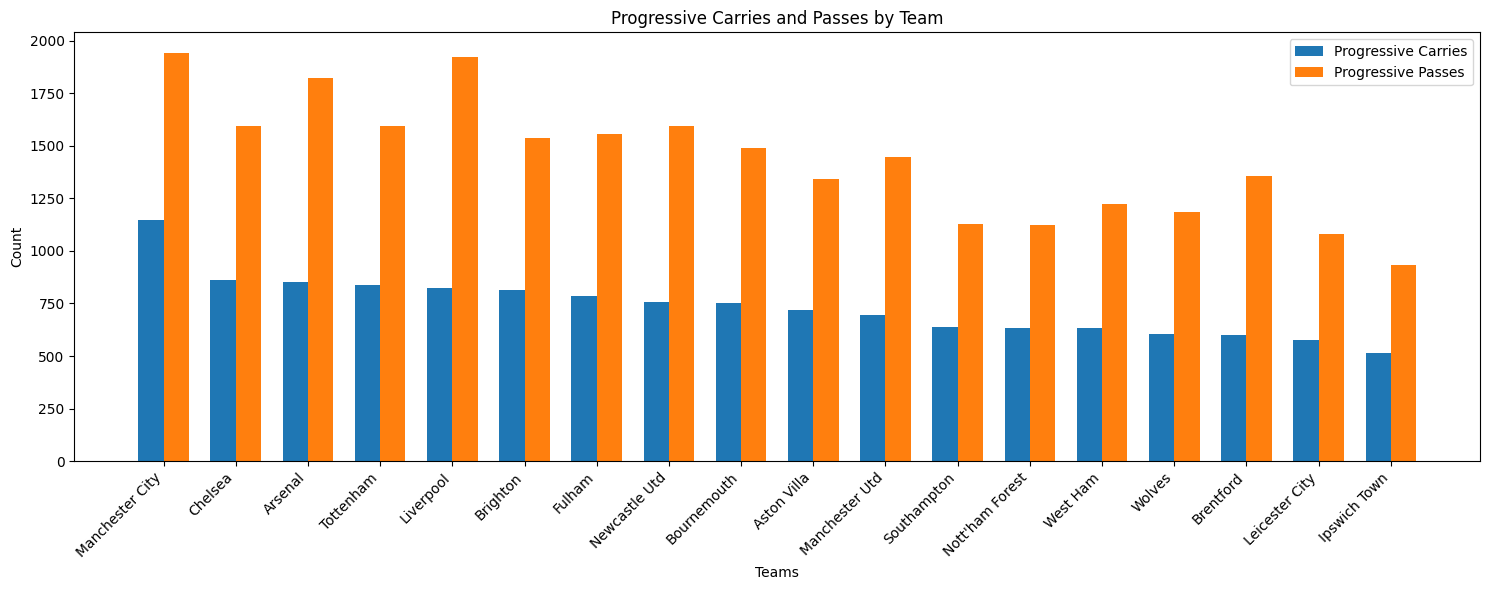

In [57]:
teams_stats = df.groupby('Squad').agg({
    'PrgC': 'sum',
    'PrgP': 'sum',
    'PrgC': 'sum',
    'Gls': 'sum',   
    'xG': 'sum',    
    'Ast': 'sum',   
    'xAG': 'sum',   
    'Min': 'sum'    
}).round(2) 


teams_stats=teams_stats.sort_values('PrgC',ascending=False)[:18]


width=0.35
x=np.arange(len(teams_stats.index))

plt.figure(figsize=(15, 6))

plt.bar(x-width/2, teams_stats['PrgC'],width,label='Progressive Carries')
plt.bar(x+width/2, teams_stats['PrgP'],width,label='Progressive Passes')

plt.xticks(x,teams_stats.index,rotation=45, ha='right')


plt.title('Progressive Carries and Passes by Team')
plt.xlabel('Teams')
plt.ylabel('Count')

plt.legend()

plt.tight_layout()


plt.show()

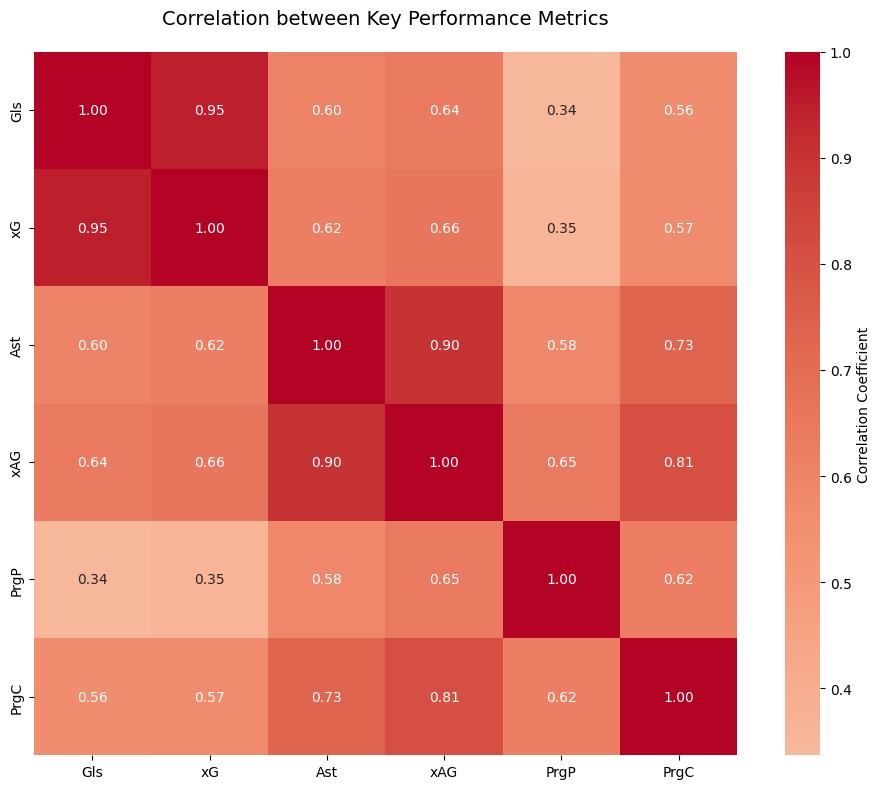

In [58]:
correlation_columns=['Gls','xG','Ast','xAG','PrgP','PrgC']
correlation_matrix=df[correlation_columns].corr()

plt.figure(figsize=(10,8))

sns.heatmap(correlation_matrix,
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            cbar_kws= {'label':'Correlation Coefficient'})

plt.title('Correlation between Key Performance Metrics', pad=20, fontsize=14)
plt.tight_layout()
plt.show()